# CREDIT EDA CASE STUDY


    
## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.


#### Importing all necessary libraries.

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Reading the application dataset

In [3]:
app_data = pd.read_csv("application_data.csv")
prev_data = pd.read_csv("previous_application.csv")

#### Understanding the  dataset

In [4]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
pd.set_option('display.max_column',100)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [7]:
app_data_shape= app_data.shape
prev_data_shape = prev_data.shape
print('Application has number of rows and column :', app_data_shape)
print('Previous application has number of rows and column :',prev_data_shape)

Application has number of rows and column : (307511, 122)
Previous application has number of rows and column : (1670214, 37)


In [8]:
#checking numerical variables of application dataframe 
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

In [9]:
#checking numerical variables of previous application dataframe 
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [10]:
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [11]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

<div class="alert-info">

#### Conclusion of understanding the datasets
 After checking all the dataset we have found that :
 1. Application dataset has 122 coulmns in which 1 is a target variable and 307511 entries
 
  Out of which dtypes are: float64(65), int64(41), object(16)
  
  
 2. Previous application dataset has 37 columns and 1670214 entries
 
   Out of  which dtypes are: float64(15), int64(6), object(16)
   
   
 3. As per info status there are null values present in dataset which has to be adressed furture.
 
 
 4. Data types of variables are found satisfactory as of now.
 
 
 5. Data frame header and index are alligned properly.
 </div>

### DATA CLEANING
Check for null values

In [12]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [13]:
# Checking null values for application dataset
app_data_null = pd.DataFrame(round((app_data.isnull().sum())/app_data_shape[0]*100,2)).reset_index()
app_data_null.columns =['COLUMN NAME' , 'NULL VALUES %']
print(app_data_null.sort_values(by='NULL VALUES %',ascending=False))

                      COLUMN NAME  NULL VALUES %
76                COMMONAREA_MEDI          69.87
48                 COMMONAREA_AVG          69.87
62                COMMONAREA_MODE          69.87
70       NONLIVINGAPARTMENTS_MODE          69.43
56        NONLIVINGAPARTMENTS_AVG          69.43
84       NONLIVINGAPARTMENTS_MEDI          69.43
86             FONDKAPREMONT_MODE          68.39
68          LIVINGAPARTMENTS_MODE          68.35
54           LIVINGAPARTMENTS_AVG          68.35
82          LIVINGAPARTMENTS_MEDI          68.35
52                  FLOORSMIN_AVG          67.85
66                 FLOORSMIN_MODE          67.85
80                 FLOORSMIN_MEDI          67.85
75               YEARS_BUILD_MEDI          66.50
61               YEARS_BUILD_MODE          66.50
47                YEARS_BUILD_AVG          66.50
21                    OWN_CAR_AGE          65.99
81                  LANDAREA_MEDI          59.38
67                  LANDAREA_MODE          59.38
53                  

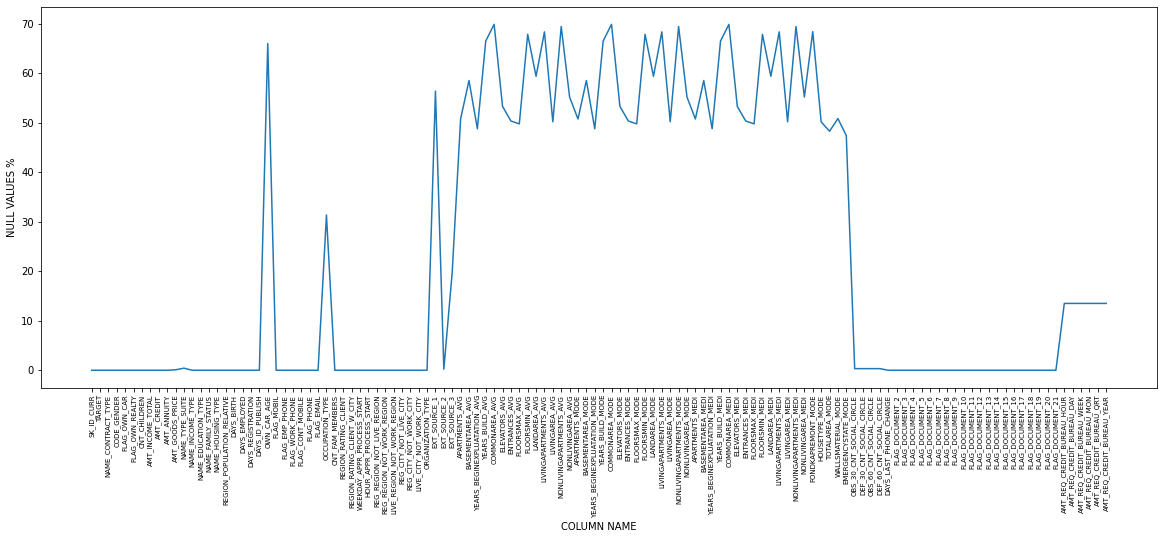

In [14]:
# Checking null values for application dataset by graphical view

fig = plt.figure(figsize=(20,7))
missing_app_graph = sns.lineplot(x='COLUMN NAME',y='NULL VALUES %',data=app_data_null)
plt.xticks(rotation =90,fontsize =7)
plt.show()

In [15]:
# Colums with more null values 
app_data_null_47= app_data_null[app_data_null['NULL VALUES %']>=47.4]
print('Total columns with null values more than 47.4% is', len(app_data_null_47))
print(app_data_null_47)

Total columns with null values more than 47.4% is 49
                     COLUMN NAME  NULL VALUES %
21                   OWN_CAR_AGE          65.99
41                  EXT_SOURCE_1          56.38
44                APARTMENTS_AVG          50.75
45              BASEMENTAREA_AVG          58.52
46   YEARS_BEGINEXPLUATATION_AVG          48.78
47               YEARS_BUILD_AVG          66.50
48                COMMONAREA_AVG          69.87
49                 ELEVATORS_AVG          53.30
50                 ENTRANCES_AVG          50.35
51                 FLOORSMAX_AVG          49.76
52                 FLOORSMIN_AVG          67.85
53                  LANDAREA_AVG          59.38
54          LIVINGAPARTMENTS_AVG          68.35
55                LIVINGAREA_AVG          50.19
56       NONLIVINGAPARTMENTS_AVG          69.43
57             NONLIVINGAREA_AVG          55.18
58               APARTMENTS_MODE          50.75
59             BASEMENTAREA_MODE          58.52
60  YEARS_BEGINEXPLUATATION_MODE   

<div class="alert-info">

### Graph and null value insight of previous application dataset
    
1. We can see that from null value list percentage of null values are major from 47.4% .

2. Graph gives us the outline of coulums which are having very high percentage of null values.

3. Total 49 columns are having null values above 47.4% which can be deleted because of high null values to improve the accuracy of analysis

</div>

In [16]:
# Checking null values for previous application dataset
Prev_data_null = pd.DataFrame(round((prev_data.isnull().sum())/prev_data_shape[0]*100,2)).reset_index()
Prev_data_null.columns =['COLUMN NAME1' , 'NULL VALUES1 %']
print(Prev_data_null.sort_values(by='NULL VALUES1 %',ascending=False))

                   COLUMN NAME1  NULL VALUES1 %
14     RATE_INTEREST_PRIVILEGED           99.64
13        RATE_INTEREST_PRIMARY           99.64
12            RATE_DOWN_PAYMENT           53.64
6              AMT_DOWN_PAYMENT           53.64
20              NAME_TYPE_SUITE           49.12
36    NFLAG_INSURED_ON_APPROVAL           40.30
31           DAYS_FIRST_DRAWING           40.30
32               DAYS_FIRST_DUE           40.30
33    DAYS_LAST_DUE_1ST_VERSION           40.30
34                DAYS_LAST_DUE           40.30
35             DAYS_TERMINATION           40.30
7               AMT_GOODS_PRICE           23.08
3                   AMT_ANNUITY           22.29
28                  CNT_PAYMENT           22.29
30          PRODUCT_COMBINATION            0.02
25                 CHANNEL_TYPE            0.00
24            NAME_PRODUCT_TYPE            0.00
29             NAME_YIELD_GROUP            0.00
26             SELLERPLACE_AREA            0.00
27         NAME_SELLER_INDUSTRY         

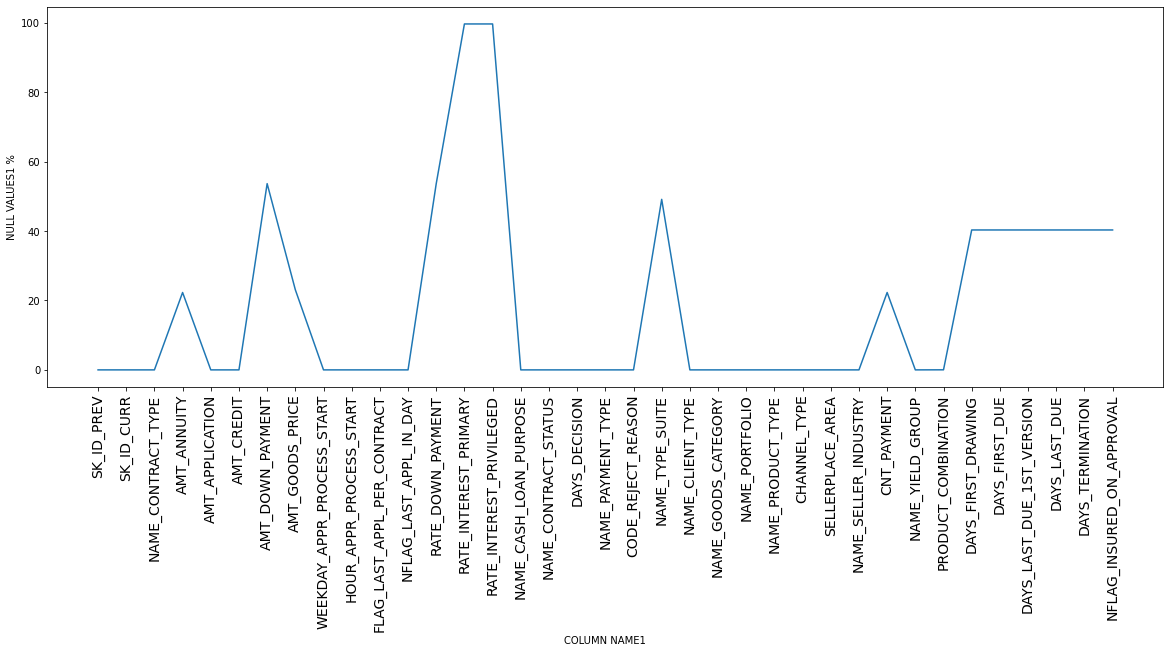

In [17]:
# Checking null values for prvious application dataset by graphical view

fig = plt.figure(figsize=(20,7))
missing_prev_graph = sns.lineplot(x='COLUMN NAME1',y='NULL VALUES1 %',data=Prev_data_null)
plt.xticks(rotation =90,fontsize =14)
plt.show()

In [18]:
# Colums with more null values 
prev_data_null_40= Prev_data_null[Prev_data_null['NULL VALUES1 %']>=40.3]
print('Total columns with null values more than 40.3% is', len(prev_data_null_40))
print(prev_data_null_40)

Total columns with null values more than 40.3% is 11
                 COLUMN NAME1  NULL VALUES1 %
6            AMT_DOWN_PAYMENT           53.64
12          RATE_DOWN_PAYMENT           53.64
13      RATE_INTEREST_PRIMARY           99.64
14   RATE_INTEREST_PRIVILEGED           99.64
20            NAME_TYPE_SUITE           49.12
31         DAYS_FIRST_DRAWING           40.30
32             DAYS_FIRST_DUE           40.30
33  DAYS_LAST_DUE_1ST_VERSION           40.30
34              DAYS_LAST_DUE           40.30
35           DAYS_TERMINATION           40.30
36  NFLAG_INSURED_ON_APPROVAL           40.30


 <div class="alert-info">

### Graph and null value insight of previous application dataset
    
1. We can see that from null value list percentage of null values are major from 40.3% .

2. Graph gives us the outline of coulums which are having very high percentage of null values.
3.Total 11 columns are having null values above 40.3% which can be deleted because of high null values to improve the accuracy of analysis

</div>

In [19]:
# Dropping the unnessary coulmns from applicataion datset
app_data_drop=app_data_null_47["COLUMN NAME"].tolist()
app_data.drop(labels=app_data_drop,axis=1,inplace=True)

In [20]:
app_data.shape

(307511, 73)

In [21]:
# Dropping the unnessary coulmns from previous applicataion datset
prev_data_drop=prev_data_null_40["COLUMN NAME1"].tolist()
prev_data.drop(labels=prev_data_drop,axis=1,inplace=True)

In [22]:
prev_data.shape

(1670214, 26)

### Checking for other columns relation with target values of application dataset

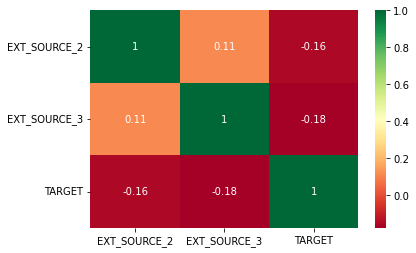

In [23]:
#checking correlation of exit_columns with Target column 

ext_source = app_data[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr()
sns.heatmap(ext_source,cmap='RdYlGn',annot= True)
plt.show()

<div class="alert-info">

### Correlation heat map inputs
    
1. We can see that ext_source has negligable correlatiom with target variabale.

2. Even ext_source_2 and 3 has around 20% of null values so these columns can be dropped.

</div>

In [24]:
# Dropping the unnessary coulmns from applicataion datset
app_data.drop(labels=['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)

In [25]:
app_data.shape

(307511, 71)

### Checking the columns with lower side missing values

In [26]:
## Checking missing value columns between 0 & 13.9% in the data set
app_data[app_data.columns[(app_data.isnull().sum() > 0) & (app_data.isnull().sum() < (len(app_data)*0.14))]]

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,24700.5,351000.0,Unaccompanied,1.0,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35698.5,1129500.0,Family,2.0,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6750.0,135000.0,Unaccompanied,1.0,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29686.5,297000.0,Unaccompanied,2.0,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,Unaccompanied,1.0,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,27558.0,225000.0,Unaccompanied,1.0,0.0,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,12001.5,225000.0,Unaccompanied,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,29979.0,585000.0,Unaccompanied,1.0,6.0,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,20205.0,319500.0,Unaccompanied,2.0,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
app_data.columns[(app_data.isnull().sum() > 0) & (app_data.isnull().sum() < (len(app_data)*0.14))]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

<div class="alert-info">

### input of Colums with lower side missing values 
    
1. We have identified the missing values columns below 14%

2. We can try inputing values for above columns in a suitabe steps.

</div>

In [28]:
## Let us look at the column NAME_TYPE_SUITE - Who accompanied client when applying for the previous application
app_data["NAME_TYPE_SUITE"].isna().sum()

1292

In [29]:
app_data["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

<div class="alert-info">

### Input from NAME_TYPE_SUITE Colums 
    
1. It looks like missing values are MCAR type .

2. We can try inputing values for above columns as Unaccompanied because these missing values may have been generated beacuse the client was not occumpanied by any one during application.

</div>

In [30]:
app_data["NAME_TYPE_SUITE"].fillna(value='Unaccompanied',inplace = True)

In [31]:
app_data["NAME_TYPE_SUITE"].isna().sum()

0

In [32]:
## Let us look at the column CNT_FAM_MEMBERS - How many family members does client have
app_data["CNT_FAM_MEMBERS"].isna().sum()

2

In [33]:
app_data["CNT_FAM_MEMBERS"].median()

2.0

<div class="alert-info">

### Input from CNT_FAM_MEMBERS Colums 
    
1. It looks like missing values are MCAR type which may be because of human error .

2. We can try inputing values for above columns as 2 memebers on any median of full data people are having 2 members which sounds safe for further analysis.

</div>

In [34]:
app_data["CNT_FAM_MEMBERS"].fillna(value=2,inplace = True)

In [35]:
app_data["CNT_FAM_MEMBERS"].isna().sum()

0

In [36]:
## Let us look at the column AMT_ANNUITY - Loan annuity
app_data["AMT_ANNUITY"].isna().sum()


12

In [37]:
app_data["AMT_ANNUITY"].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [38]:
app_data["AMT_ANNUITY"].isna().sum()/len(app_data)*100

0.003902299429939092

<div class="alert-info">

### Input from AMT_ANNUITY Colums 
    
1. Missing value % is verly low and the rows can be dropped .

</div>

In [39]:
app_data = app_data[~(app_data.AMT_ANNUITY.isna())]
app_data.shape

(307499, 71)

In [40]:
## Let us look at the column DAYS_LAST_PHONE_CHANGE - How many days before application did client change phone
app_data["DAYS_LAST_PHONE_CHANGE"].isna().sum()


1

In [41]:
app_data["DAYS_LAST_PHONE_CHANGE"].fillna(value = np.nan)

0        -1134.0
1         -828.0
2         -815.0
3         -617.0
4        -1106.0
           ...  
307506    -273.0
307507       0.0
307508   -1909.0
307509    -322.0
307510    -787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307499, dtype: float64

In [42]:
app_data[app_data["DAYS_LAST_PHONE_CHANGE"].isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
15709,118330,0,Cash loans,M,Y,Y,0,126000.0,278613.0,25911.0,252000.0,Unaccompanied,Working,Incomplete higher,Married,House / apartment,0.010643,-8574,-293,-4790.0,-1075,0,1,0,1,0,0,NaN,2.0,2,2,FRIDAY,13,0,0,0,0,0,0,Trade: type 3,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert-info">

### Input from DAYS_LAST_PHONE_CHANGE Colums 
    
1. Missing value is kept NAN since the change is phone number cannot be predicted.

</div>

### STANDARDISING VALUES

In [43]:
# check and identify for columns where the values to be standardised 
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<div class="alert-info">

### Identified below mentioned columns for standardising application data 
    
1. Convert DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_ID_PUBLISH from negative to positive as days cannot be negative.

2. We need to convert DAYS_BIRTH to age value as it may help us in furthur analysis and also convert from negative to positive value before that.
    
3. Check for data type of columns if required convert them to suitable dtype
  
4. Check for unique values if missing or wrong input, change it and replace unique values if required to 0 and 1 for further easy analysis.

</div>

In [44]:
#check for positive value 
app_data[app_data["DAYS_EMPLOYED"]>0]["DAYS_EMPLOYED"].unique()

array([365243], dtype=int64)

In [45]:
app_data[app_data["DAYS_EMPLOYED"]>0]["OCCUPATION_TYPE"].unique()

array([nan, 'Cleaning staff'], dtype=object)

In [46]:
app_data[app_data["DAYS_EMPLOYED"]>0]["NAME_INCOME_TYPE"].unique()

array(['Pensioner', 'Unemployed'], dtype=object)

In [47]:
# We can see that the column DAYS_EMPLOYED has 55374 data of similar value 365243
# These all clients are either 'Pensioner' or 'Unemployed'
# We can impute these values to 0 and rest we can multiply by -1

app_data["DAYS_EMPLOYED"].replace(365243, 0, inplace=True)

In [48]:
app_data["DAYS_EMPLOYED"] = app_data["DAYS_EMPLOYED"]*-1

In [49]:
#check for DAYS_REGISTRATION
app_data[app_data["DAYS_REGISTRATION"]>0]["DAYS_REGISTRATION"].unique()

array([], dtype=float64)

In [50]:
app_data["DAYS_REGISTRATION"] = app_data["DAYS_REGISTRATION"]*-1

In [51]:
#covert dype to int64
app_data["DAYS_REGISTRATION"] = app_data["DAYS_REGISTRATION"].astype(int)

In [52]:
app_data["DAYS_REGISTRATION"].dtype

dtype('int32')

In [53]:
#check for DAYS_ID_PUBLISH
app_data[app_data["DAYS_ID_PUBLISH"]>0]["DAYS_ID_PUBLISH"].unique()

array([], dtype=int64)

In [54]:
app_data["DAYS_ID_PUBLISH"] = app_data["DAYS_ID_PUBLISH"]*-1

2. We need to convert DAYS_BIRTH to age value as it may help us in furthur analysis and also convert from negative to positive value before that.

In [55]:
app_data["DAYS_BIRTH"] = app_data["DAYS_BIRTH"]//-365

In [56]:
#we can replace column name to age 
app_data.rename(columns= {'DAYS_BIRTH':'AGE'}, inplace = True)

In [57]:
app_data['AGE']

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: AGE, Length: 307499, dtype: int64

In [58]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,4260,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,9833,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,4311,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
#Check for dtype 
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307499 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307499 non-null  int64  
 1   TARGET                       307499 non-null  int64  
 2   NAME_CONTRACT_TYPE           307499 non-null  object 
 3   CODE_GENDER                  307499 non-null  object 
 4   FLAG_OWN_CAR                 307499 non-null  object 
 5   FLAG_OWN_REALTY              307499 non-null  object 
 6   CNT_CHILDREN                 307499 non-null  int64  
 7   AMT_INCOME_TOTAL             307499 non-null  float64
 8   AMT_CREDIT                   307499 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307221 non-null  float64
 11  NAME_TYPE_SUITE              307499 non-null  object 
 12  NAME_INCOME_TYPE             307499 non-null  object 
 13 

In [60]:
#We can change dtype of CNT_FAM_MEMBERS to int as family member will not be in decimal 
app_data["CNT_FAM_MEMBERS"] = app_data["CNT_FAM_MEMBERS"].astype(int)

In [61]:
app_data["CNT_FAM_MEMBERS"]

0         1
1         2
2         1
3         2
4         1
         ..
307506    1
307507    1
307508    1
307509    2
307510    2
Name: CNT_FAM_MEMBERS, Length: 307499, dtype: int32

In [62]:
# checking for abnormality in unique values 
app_data.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
FLAG_EMAIL                          2
FLAG_DOCUMENT_11                    2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_15                    2
FLAG_PHONE                          2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_13                    2
FLAG_CONT_MOBILE                    2
FLAG_DOCUMENT_12                    2
FLAG_EMP_PHONE                      2
FLAG_MOBIL                          2
FLAG_DOCUMEN

In [63]:
# AS we can see CODE_GENDER has 3 unique values ,we can crosscheck that
app_data['CODE_GENDER'].value_counts(normalize=True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [64]:
#we can replace XNA to F as its a major contributer in counts 
app_data.CODE_GENDER.replace('XNA', 'F', inplace=True)

In [65]:
app_data['CODE_GENDER'].value_counts(normalize=True)

F    0.658357
M    0.341643
Name: CODE_GENDER, dtype: float64

### Standardising prev application data

In [66]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


<div class="alert-info">


### Identified below mentioned columns for standardising previous application data 
    
1. Convert DAYS_DECISION from negative to positive as days cannot be negative.
    
2. Check for data type of columns if required convert them to suitable dtype
  
3. Check for unique values if missing or wrong input, change it and replace unique values if required to 0 and 1 for further easy analysis.
</div>

In [67]:
#check for DAYS_ID_PUBLISH
prev_data[prev_data["DAYS_DECISION"]>0]["DAYS_DECISION"].unique()

array([], dtype=int64)

In [68]:
prev_data["DAYS_DECISION"] = prev_data["DAYS_DECISION"]*-1

In [69]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [70]:
#check for dtype
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

#### input
As of now all the dtypes of required columns are satisfactory

In [71]:
# checking for abnormality in unique values 
prev_data.nunique().sort_values()

FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
NAME_PRODUCT_TYPE                    3
NAME_CONTRACT_STATUS                 4
NAME_CONTRACT_TYPE                   4
NAME_CLIENT_TYPE                     4
NAME_PAYMENT_TYPE                    4
NAME_PORTFOLIO                       5
NAME_YIELD_GROUP                     5
WEEKDAY_APPR_PROCESS_START           7
CHANNEL_TYPE                         8
CODE_REJECT_REASON                   9
NAME_SELLER_INDUSTRY                11
PRODUCT_COMBINATION                 17
HOUR_APPR_PROCESS_START             24
NAME_CASH_LOAN_PURPOSE              25
NAME_GOODS_CATEGORY                 28
CNT_PAYMENT                         49
SELLERPLACE_AREA                  2097
DAYS_DECISION                     2922
AMT_CREDIT                       86803
AMT_GOODS_PRICE                  93885
AMT_APPLICATION                  93885
SK_ID_CURR                      338857
AMT_ANNUITY                     357959
SK_ID_PREV               

#### Input
As of now all the unique values of required columns are satisfactory

## HANDLING OUTLIER

 <div class="alert-info">


### Major approaches to the treat outliers:

1. Imputation
2. Deletion of outliers
3. Binning of values
4. Cap the outlier

In [72]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,4260,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,9833,2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,4311,3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


AMT_INCOME_TOTAL VARIABLE

In [73]:
app_data['AMT_INCOME_TOTAL'].describe()

count    3.074990e+05
mean     1.687972e+05
std      2.371274e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.469970e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

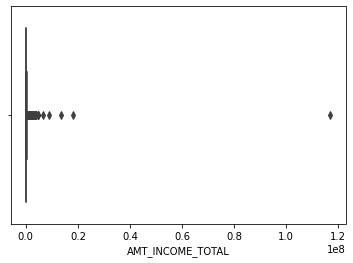

In [74]:
sns.boxplot(app_data['AMT_INCOME_TOTAL'])
plt.show()

In [75]:
# check for outliers in quantile range to get a more clear picture
app_data['AMT_INCOME_TOTAL'].quantile([0.5,0.7,0.9,0.95,0.99])

0.50    146997.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

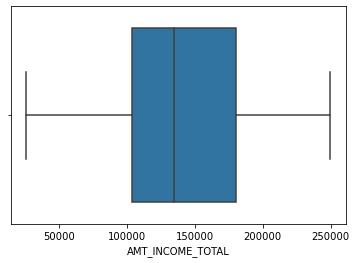

In [76]:
#check for income in range < 250000
sns.boxplot(app_data['AMT_INCOME_TOTAL'][app_data['AMT_INCOME_TOTAL']<=250000])
plt.show()

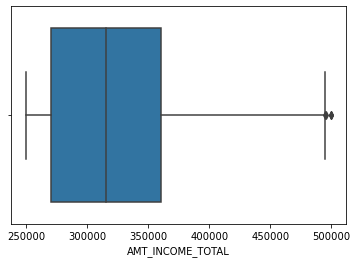

In [77]:
#check for income in range > 250000 &< 500000
sns.boxplot(app_data['AMT_INCOME_TOTAL'][(app_data['AMT_INCOME_TOTAL']>250000) & (app_data['AMT_INCOME_TOTAL']<=500000)])
plt.show()

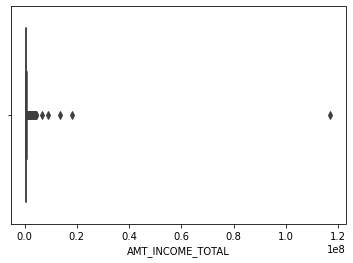

In [78]:
#check for income in range >500000
sns.boxplot(app_data['AMT_INCOME_TOTAL'][(app_data['AMT_INCOME_TOTAL']>500000)])
plt.show()

In [79]:
app_data['AMT_INCOME_TOTAL'][app_data['AMT_INCOME_TOTAL']>2000000].median()

2250000.0

Lets create a buckets for income based on above observation as LOW,MEDIUM AND HIGH

In [80]:
pd.cut(app_data['AMT_INCOME_TOTAL'], [0,250000,500000,30000000], labels = ['Low','Medium','High'])

0            Low
1         Medium
2            Low
3            Low
4            Low
           ...  
307506       Low
307507       Low
307508       Low
307509       Low
307510       Low
Name: AMT_INCOME_TOTAL, Length: 307499, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [81]:
app_data['INCOME_RANGE'] = pd.cut(app_data['AMT_INCOME_TOTAL'], [0,250000,500000,30000000], labels = ['Low','Medium','High'])

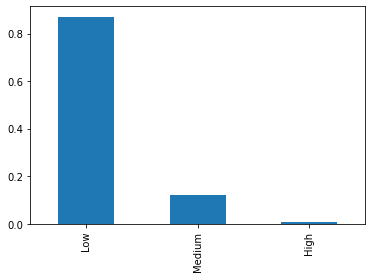

In [82]:
app_data['INCOME_RANGE'].value_counts(normalize=True).plot.bar()
plt.show()

AGE VARIABLE

In [83]:
app_data['AGE'].describe()

count    307499.000000
mean         43.436125
std          11.954624
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

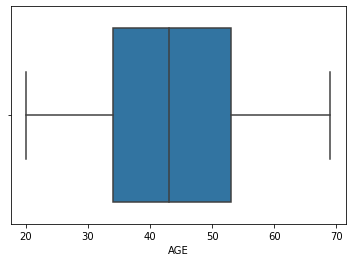

In [84]:
sns.boxplot(app_data['AGE'])
plt.show()

 <div class="alert-info">


### INPUT FROM AGE  
    
1. There are no any outliers in age column
    
2. we can create buckets of age range for better analysis 
  

In [85]:
pd.cut(app_data['AGE'], [0,20,30,40,50,100], labels = ['0-20','20-30','30-40','40-50','50 above'])

0            20-30
1            40-50
2         50 above
3         50 above
4         50 above
            ...   
307506       20-30
307507    50 above
307508       40-50
307509       30-40
307510       40-50
Name: AGE, Length: 307499, dtype: category
Categories (5, object): ['0-20' < '20-30' < '30-40' < '40-50' < '50 above']

In [86]:
app_data['AGE_GROUP']= pd.cut(app_data['AGE'], [0,20,30,40,50,100], labels = ['0-20','20-30','30-40','40-50','50 above'])

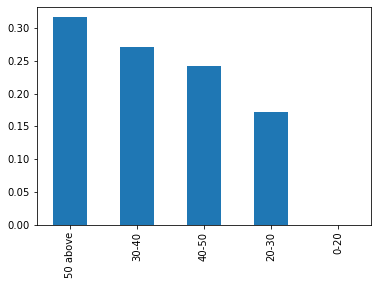

In [87]:
app_data['AGE_GROUP'].value_counts(normalize=True).plot.bar()
plt.show()

DAYS_EMPLOYED

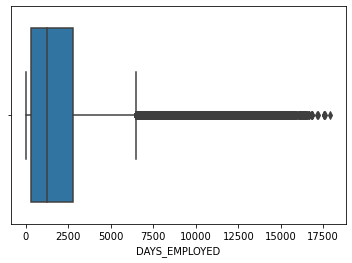

In [88]:
sns.boxplot(app_data['DAYS_EMPLOYED'])
plt.show()

In [89]:
pd.cut(app_data["DAYS_EMPLOYED"]//365, [-1,5,10,20,30,40,50,60,1500], labels = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above'])

0           0-5
1           0-5
2           0-5
3          5-10
4          5-10
          ...  
307506      0-5
307507      0-5
307508    20-30
307509    10-20
307510      0-5
Name: DAYS_EMPLOYED, Length: 307499, dtype: category
Categories (8, object): ['0-5' < '5-10' < '10-20' < '20-30' < '30-40' < '40-50' < '50-60' < '60 above']

In [90]:
app_data["YEARS_EMPLOYED"] = pd.cut(app_data["DAYS_EMPLOYED"]//365, [-1,5,10,20,30,40,50,60,1500], labels = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above'])

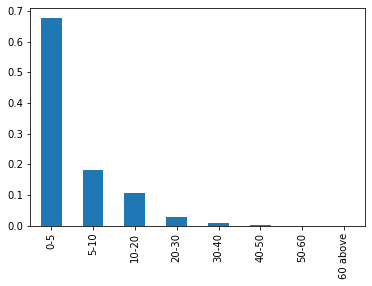

In [91]:
app_data['YEARS_EMPLOYED'].value_counts(normalize=True).plot.bar()
plt.show()

<div class="alert-info">


### INPUT FROM OULIERS IDENTIFICATION OF APPLICATION DATA 
    
1. AMT_INCOME_TOTAL had MT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others and then after viweing in buckets of diffeternt range we categorised the income value
    
2. AGE coulum had no ouliers and hence for better analysis and understanding age group were created and found that major applicats of age 50 and above

3. DAYS_EMPLOYED  converted into years to have a better view for analyis and them YEARS_EMPLOYED were bucketed to range and found that 0-5 yaers employed showed the spike
  

In [92]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [93]:
prev_data[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_DECISION
count,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.297984e+06,1.670214e+06
mean,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,3.139511e+02,1.605408e+01,8.806797e+02
std,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,7.127443e+03,1.456729e+01,7.790997e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00
25%,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,-1.000000e+00,6.000000e+00,2.800000e+02
50%,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,3.000000e+00,1.200000e+01,5.810000e+02
75%,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,8.200000e+01,2.400000e+01,1.300000e+03
max,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,4.000000e+06,8.400000e+01,2.922000e+03


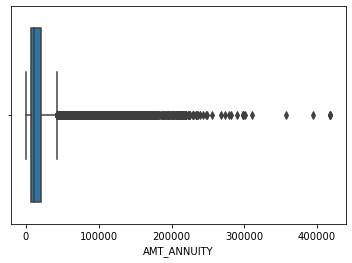

In [94]:
sns.boxplot(prev_data['AMT_ANNUITY'])
plt.show()

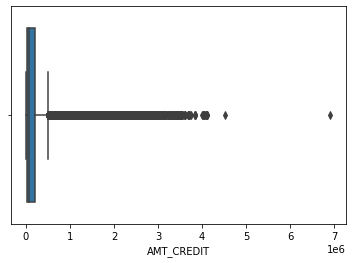

In [95]:
sns.boxplot(prev_data['AMT_CREDIT'])
plt.show()

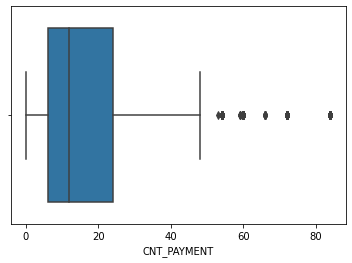

In [96]:
sns.boxplot(prev_data['CNT_PAYMENT'])
plt.show()

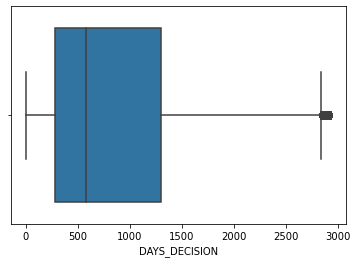

In [97]:
sns.boxplot(prev_data['DAYS_DECISION'])
plt.show()

 <div class="alert-info">


### INPUT FROM OULIERS IDENTIFICATION OF PREVIOUS APP DATA 
    
1. AMT_ANNUITY ,AMT_CREDIT has huge number of ouliers 
    
2. CNT_PAYMENT has less number of outliers

3. DAYS_DECISION has some outliers which says that decision were taken long back

# ANALYSIS OF DATA 

### Checking Data Imbalance

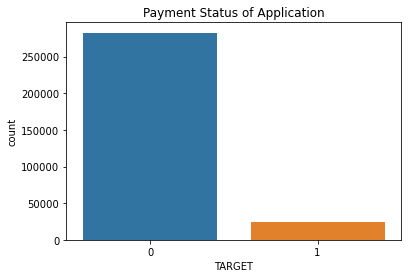

In [98]:
sns.countplot(app_data['TARGET'])
plt.title("Payment Status of Application")
plt.show()

In [99]:
# #Checking data imbalace ratio
Defaulters  = app_data[app_data["TARGET"] == 1]
Repayers  = app_data[app_data["TARGET"] == 0]

print("No. of Defaulters: ", Defaulters.shape[0])
print("No. of Repayers: ", Repayers.shape[0])

No. of Defaulters:  24825
No. of Repayers:  282674


In [100]:
print("Defaulters percentage : ", Defaulters.shape[0]*100/(Defaulters.shape[0]+Repayers.shape[0]))
print("Repayers percentage  : ", Repayers.shape[0]*100/(Repayers.shape[0]+Defaulters.shape[0]))

Defaulters percentage :  8.073196986006458
Repayers percentage  :  91.92680301399353


<div class="alert-info">


### Conclusion of data imbalace
    
The data is highly imbalance as defaulters to Repayers ratio is high i.e defaulters are very less in total data
    
Imbalance ratio - Defaulters: Repayers = 8:92

### Univariate Analysis

<div class="alert-info">


### Approch for Univariate Analysis
    
1.Categorical segmented Univariate Analysis


2.Numerical segmented Univariate Analysis

In [101]:
# Function defined to calculate % of defaulters for every unique values

def defaulters_per(df,col):
    final_df = pd.DataFrame(columns=['value','% of defaulters'])
                                    
    for value in df[col].unique():
        def_cnt = df[(df[col]== value) & (df['TARGET'] == 1)].shape[0]
        ttl_cnt = df[df[col] == value].shape[0]
        final_df = final_df.append({'value': value,'% of defaulters':(def_cnt*100/ttl_cnt)},ignore_index=True).sort_values(by='% of defaulters', ascending=False)
    return final_df.set_index('value')

In [102]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,AGE_GROUP,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,20-30,0-5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,40-50,0-5
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,4260,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,50 above,0-5
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,9833,2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,50 above,5-10
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,4311,3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,50 above,5-10


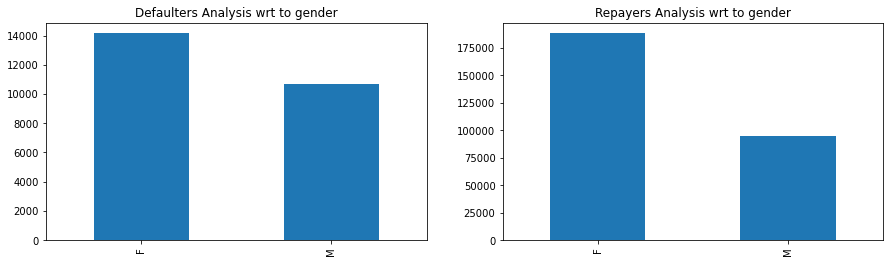

In [103]:
#calculate the percentage of each gender category for both Defaulters & Repayers.
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to gender')
Defaulters['CODE_GENDER'].value_counts().plot.bar()
plt.subplot(1,2,2)
plt.title('Repayers Analysis wrt to gender')
Repayers['CODE_GENDER'].value_counts().plot.bar()
plt.show()

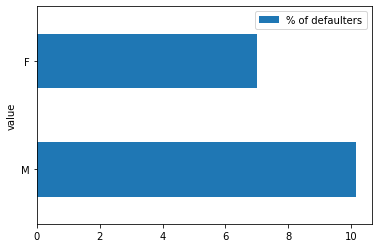

In [104]:
defaulters_per(app_data,'CODE_GENDER').plot.barh()
plt.show()

<div class="alert-info">


### Inputs from CODE_GENDER (deafulters & Repayers)
    
1) We can see that female candidates are applying for the loan more in number.
    
    
2) Female candidates are more likely to repay the loan than male cadidates.

In [105]:
#calculate the percentage of each NAME_CONTRACT_TYPE category for Defaulters .
Defaulters['NAME_CONTRACT_TYPE'].value_counts(normalize = True)

Cash loans         0.935388
Revolving loans    0.064612
Name: NAME_CONTRACT_TYPE, dtype: float64

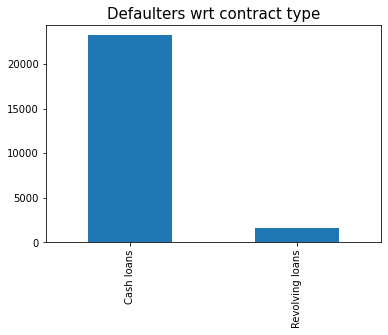

In [106]:
plt.title('Defaulters wrt contract type', fontdict={'fontsize':15})
Defaulters['NAME_CONTRACT_TYPE'].value_counts().plot.bar()
plt.show()

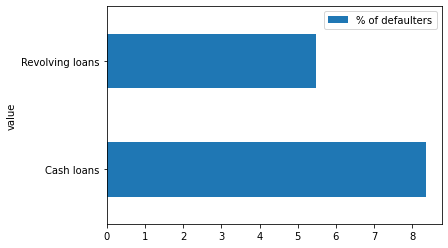

In [107]:
defaulters_per(app_data,'NAME_CONTRACT_TYPE').plot.barh()
plt.show()

<div class="alert-info">


### Inputs from NAME_CONTRACT_TYPE defaulters 
    
1) Number Cash loans is quite higher than Revolving Loans
    
    
2) Candidates who have taken cash loans are more trouble repaying the loan

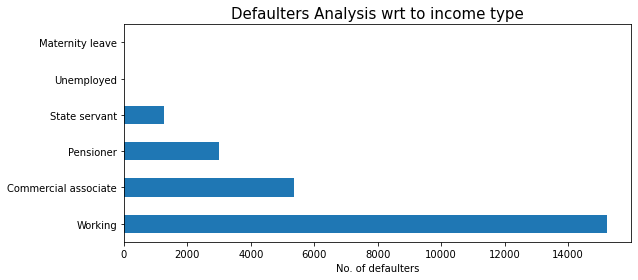

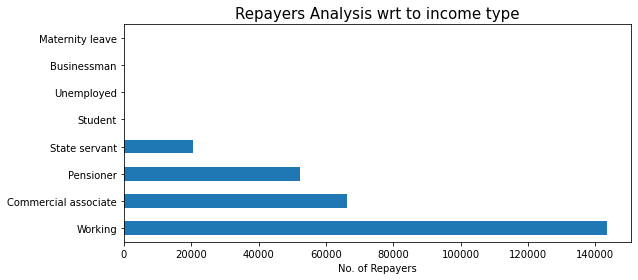

In [108]:
#calculate the percentage of each NAME_INCOME_TYPE category for Defaulters .
plt.figure(figsize=[20,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to income type', fontdict={'fontsize':15})
Defaulters['NAME_INCOME_TYPE'].value_counts().plot.barh()
plt.xlabel('No. of defaulters')
plt.figure(figsize=[20,4])
plt.subplot(1,2,2)
plt.title('Repayers Analysis wrt to income type',fontdict={'fontsize':15})
Repayers['NAME_INCOME_TYPE'].value_counts().plot.barh()
plt.xlabel('No. of Repayers')
plt.show()

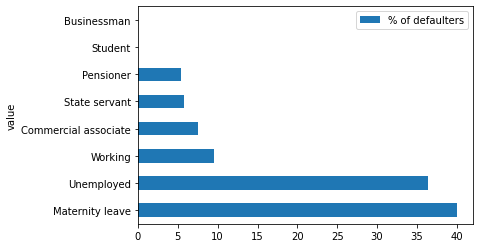

In [109]:
defaulters_per(app_data,'NAME_INCOME_TYPE').plot.barh()
plt.show()

<div class="alert-info">


### Inputs from NAME_INCOME_TYPE  
    
1) Most application are from working professinals 
    
    
2) But applicants with maternity leave type are more likely not to repaythe loans then followed by unemployed category.

3) Businessman and Student with least defaults 

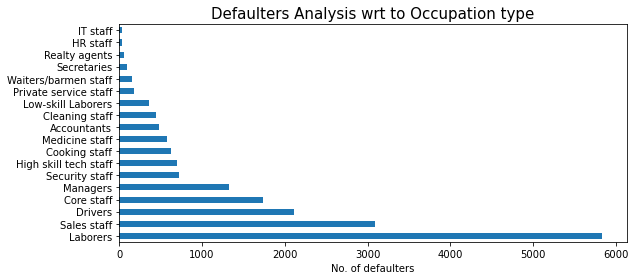

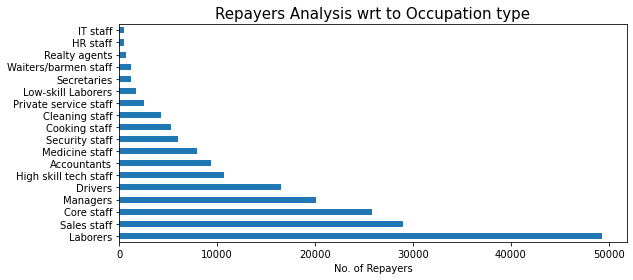

In [110]:
#calculate the percentage of each OCCUPATION_TYPE category for Defaulters .
plt.figure(figsize=[20,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to Occupation type', fontdict={'fontsize':15})
Defaulters['OCCUPATION_TYPE'].value_counts().plot.barh()
plt.xlabel('No. of defaulters')
plt.figure(figsize=[20,4])
plt.subplot(1,2,2)
plt.title('Repayers Analysis wrt to Occupation type',fontdict={'fontsize':15})
Repayers['OCCUPATION_TYPE'].value_counts().plot.barh()
plt.xlabel('No. of Repayers')
plt.show()

In [111]:
# Imputing missing value for OCCUPATION TYPE as "Unknown" to check defaulter %
app_data['OCCUPATION_TYPE'].fillna("Unknown", inplace=True)

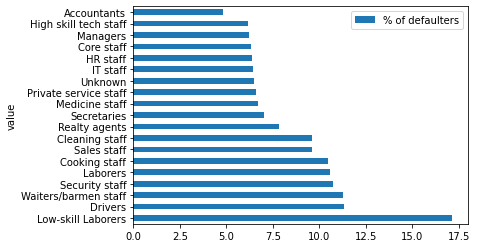

In [112]:
defaulters_per(app_data,'OCCUPATION_TYPE').plot.barh()
plt.show()

<div class="alert-info">


### Inputs from OCCUPATION_TYPE  
    
1) Most application are from labour occupation 
    
2) But applicants of low-skill laborers occupation are more likely not to repay the loans.


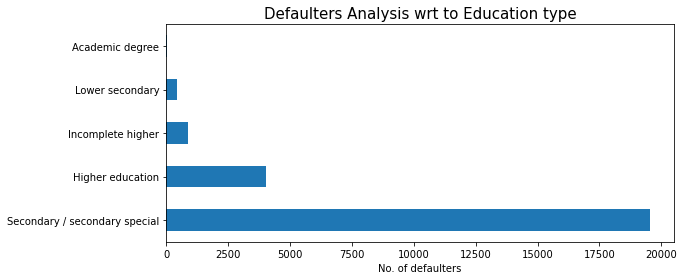

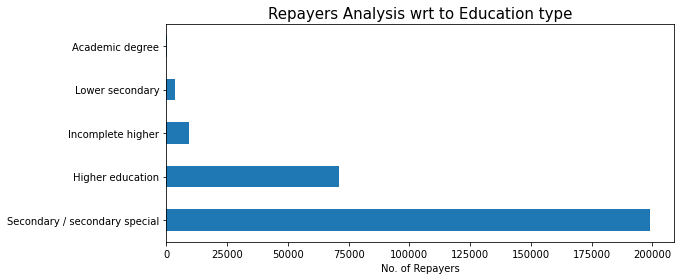

In [113]:
#calculate the percentage of each NAME_EDUCATION_TYPE category  .
plt.figure(figsize=[20,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to Education type', fontdict={'fontsize':15})
Defaulters['NAME_EDUCATION_TYPE'].value_counts().plot.barh()
plt.xlabel('No. of defaulters')
plt.figure(figsize=[20,4])
plt.subplot(1,2,2)
plt.title('Repayers Analysis wrt to Education type',fontdict={'fontsize':15})
Repayers['NAME_EDUCATION_TYPE'].value_counts().plot.barh()
plt.xlabel('No. of Repayers')
plt.show()

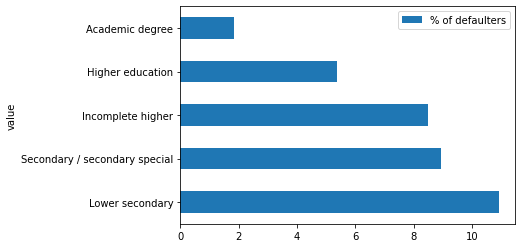

In [114]:
defaulters_per(app_data,'NAME_EDUCATION_TYPE').plot.barh()
plt.show()

<div class="alert-info">


### Inputs from NAME_EDUCATION_TYPE  
    
1) Most application are having seconday education. 
    
2) But applicants with lower secondary education are more likely not to repay the loans then followed by seconday education.

3) Academic degree and higher education people are less likely of default.

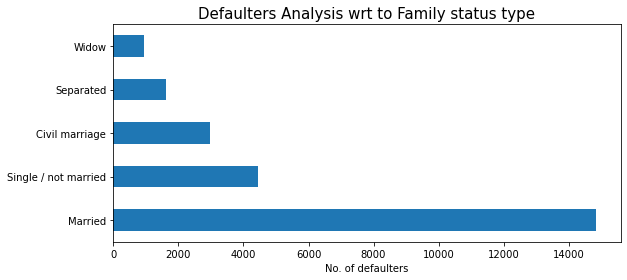

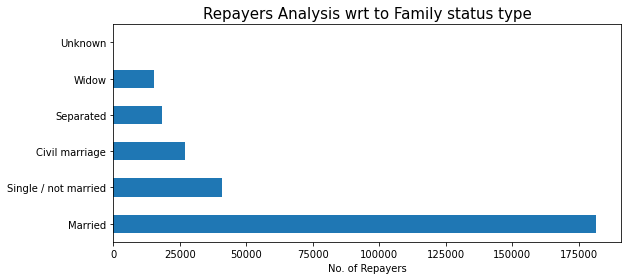

In [115]:
#calculate the percentage of each NAME_FAMILY_STATUS category .
plt.figure(figsize=[20,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to Family status type', fontdict={'fontsize':15})
Defaulters['NAME_FAMILY_STATUS'].value_counts().plot.barh()
plt.xlabel('No. of defaulters')
plt.figure(figsize=[20,4])
plt.subplot(1,2,2)
plt.title('Repayers Analysis wrt to Family status type',fontdict={'fontsize':15})
Repayers['NAME_FAMILY_STATUS'].value_counts().plot.barh()
plt.xlabel('No. of Repayers')
plt.show()

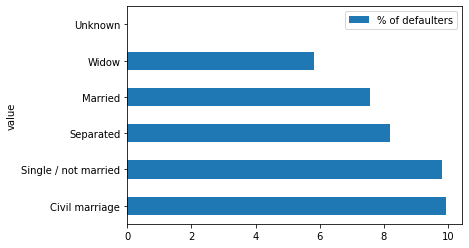

In [116]:
defaulters_per(app_data,'NAME_FAMILY_STATUS').plot.barh()
plt.show()

<div class="alert-info">


### Inputs from NAME_FAMILY_STATUS  
    
1) Most application are from Married people. 
    
2) But applicants with civil marriage and single are more likely not to repay the loans.

3) Widow are more likley repay.

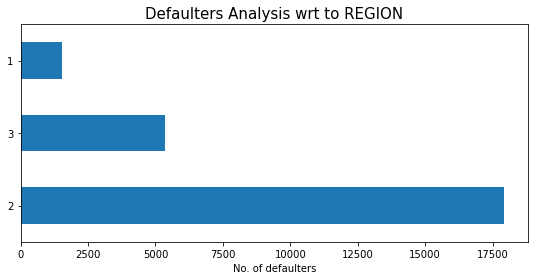

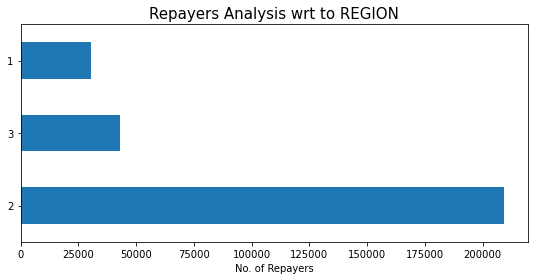

In [117]:
#calculate the percentage of each REGION_RATING_CLIENT where applicant lives .
plt.figure(figsize=[20,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to REGION', fontdict={'fontsize':15})
Defaulters['REGION_RATING_CLIENT'].value_counts().plot.barh()
plt.xlabel('No. of defaulters')
plt.figure(figsize=[20,4])
plt.subplot(1,2,2)
plt.title('Repayers Analysis wrt to REGION',fontdict={'fontsize':15})
Repayers['REGION_RATING_CLIENT'].value_counts().plot.barh()
plt.xlabel('No. of Repayers')
plt.show()

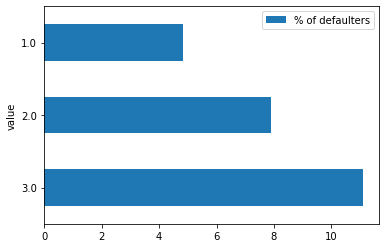

In [118]:
defaulters_per(app_data,'REGION_RATING_CLIENT').plot.barh()
plt.show()

<div class="alert-info">


### Inputs from REGION_RATING_CLIENT  
    
1) Most application are from Region 2 . 
    
2) But applicants from region 3 are more likely not to repay the loans.

3) Region 1 apllicants are more likley repay.

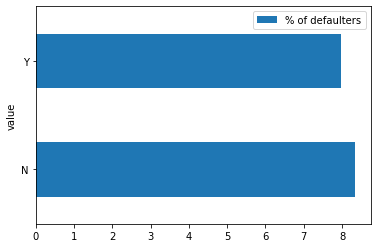

In [119]:
#Checking defaulters by realestate,own acra,flat etc

defaulters_per(app_data,'FLAG_OWN_REALTY').plot.barh()
plt.show()

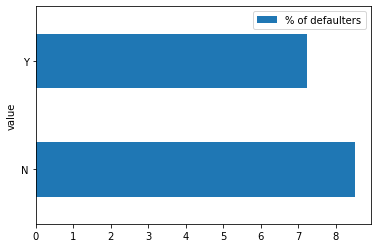

In [120]:
defaulters_per(app_data,'FLAG_OWN_CAR').plot.barh()
plt.show()

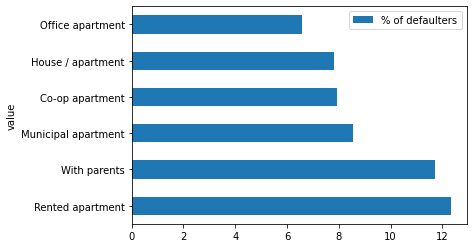

In [121]:
defaulters_per(app_data,'NAME_HOUSING_TYPE').plot.barh()
plt.show()

<div class="alert-info">


### Inputs from FLAG_OWN_REALTY, FLAG_OWN_CAR,NAME_HOUSING_TYPE
    
1) There is no any major inputs from FLAG_OWN_REALTY, FLAG_OWN_CAR.
    
2) But can say that people who stay in rented house and with parents are more likely to default.

### Categorical ordered univariate analysis

In [122]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,AGE_GROUP,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,20-30,0-5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,40-50,0-5
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,4260,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,50 above,0-5
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,9833,2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,50 above,5-10
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,4311,3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,50 above,5-10


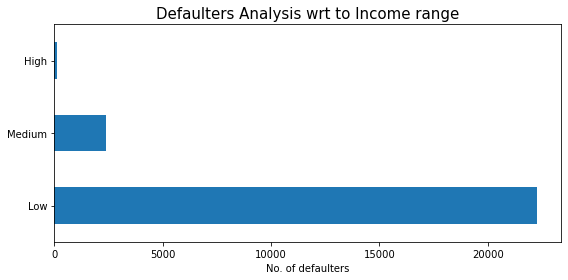

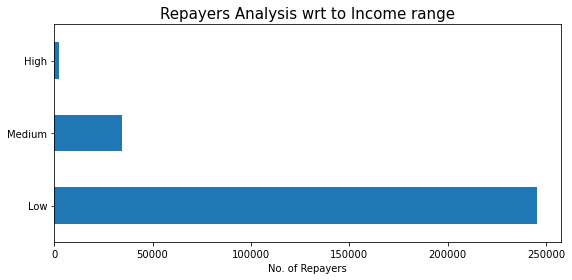

In [123]:
#calculate the percentage of each INCOME_RANGE .
plt.figure(figsize=[20,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to Income range', fontdict={'fontsize':15})
Defaulters['INCOME_RANGE'].value_counts().plot.barh()
plt.xlabel('No. of defaulters')
plt.figure(figsize=[20,4])
plt.subplot(1,2,2)
plt.title('Repayers Analysis wrt to Income range',fontdict={'fontsize':15})
Repayers['INCOME_RANGE'].value_counts().plot.barh()
plt.xlabel('No. of Repayers')
plt.show()

<div class="alert-info">


### Inputs from INCOME_RANGE 
    
1) Major applications are from low income range (0-250000).
    
2) Applicants whose income is in between 0 to 250000 are default.

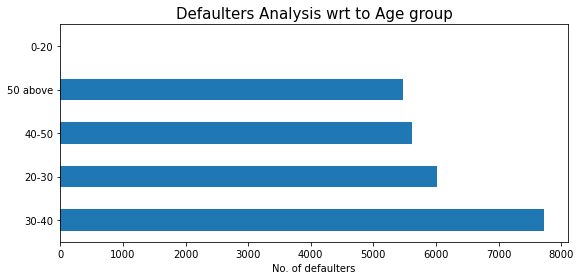

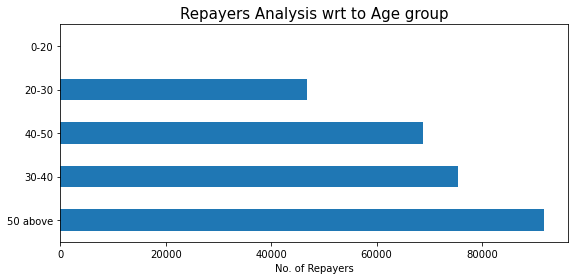

In [124]:
#calculate the percentage of each AGE_GROUP .
plt.figure(figsize=[20,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to Age group', fontdict={'fontsize':15})
Defaulters['AGE_GROUP'].value_counts().plot.barh()
plt.xlabel('No. of defaulters')
plt.figure(figsize=[20,4])
plt.subplot(1,2,2)
plt.title('Repayers Analysis wrt to Age group',fontdict={'fontsize':15})
Repayers['AGE_GROUP'].value_counts().plot.barh()
plt.xlabel('No. of Repayers')
plt.show()

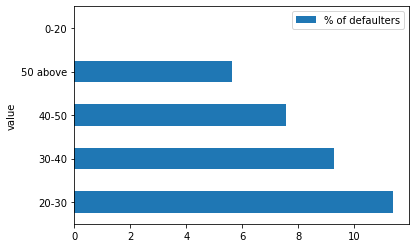

In [125]:
defaulters_per(app_data,'AGE_GROUP').plot.barh()
plt.show()

<div class="alert-info">


### Inputs from AGE_GROUP 
    
1) Applicants with age group 20-30 are more likely to default.
    
2) But applicants who are above 50 are very good repayers.

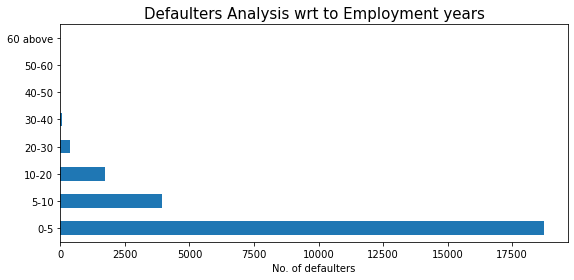

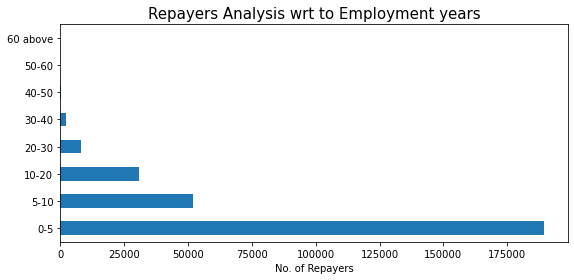

In [126]:
#calculate the percentage of each YEARS_EMPLOYED .
plt.figure(figsize=[20,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to Employment years', fontdict={'fontsize':15})
Defaulters['YEARS_EMPLOYED'].value_counts().plot.barh()
plt.xlabel('No. of defaulters')
plt.figure(figsize=[20,4])
plt.subplot(1,2,2)
plt.title('Repayers Analysis wrt to Employment years',fontdict={'fontsize':15})
Repayers['YEARS_EMPLOYED'].value_counts().plot.barh()
plt.xlabel('No. of Repayers')
plt.show()

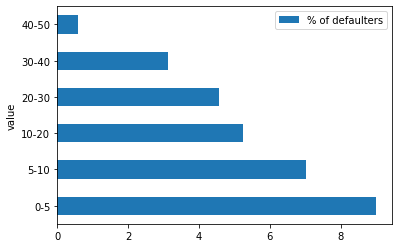

In [127]:
defaulters_per(app_data,'YEARS_EMPLOYED').plot.barh()
plt.show()

<div class="alert-info">


### Inputs from YEARS_EMPLOYED 
    
1) Applications are high from work experience 0-5 years.
    
2) If we observe the % defaulters are also high for applicants work experience 0-5 years.

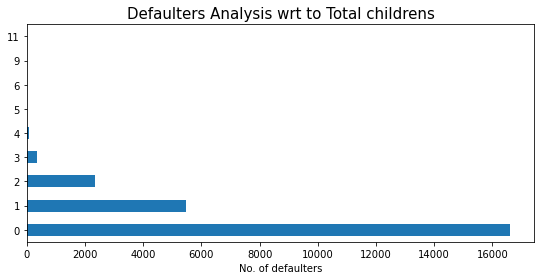

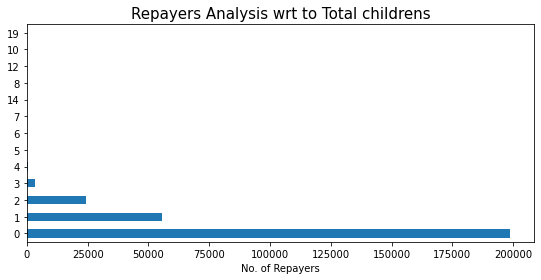

In [128]:
#calculate the percentage of each CNT_CHILDREN .
plt.figure(figsize=[20,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to Total childrens', fontdict={'fontsize':15})
Defaulters['CNT_CHILDREN'].value_counts().plot.barh()
plt.xlabel('No. of defaulters')
plt.figure(figsize=[20,4])
plt.subplot(1,2,2)
plt.title('Repayers Analysis wrt to Total childrens',fontdict={'fontsize':15})
Repayers['CNT_CHILDREN'].value_counts().plot.barh()
plt.xlabel('No. of Repayers')
plt.show()

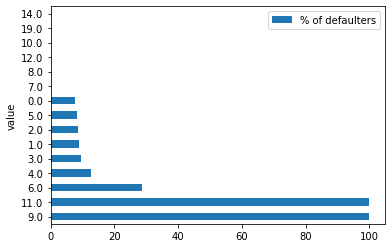

In [129]:
defaulters_per(app_data,'CNT_CHILDREN').plot.barh()
plt.show()

<div class="alert-info">


### Inputs from CNT_CHILDREN  
    
1) Most application are from applicants having no children(or may not be married).

2) But as the chIldrens increases more than 3 the default rate increases (MAX- 9 & 11).

3) But also we need to see that applicants with more than 3 childrens are very low.

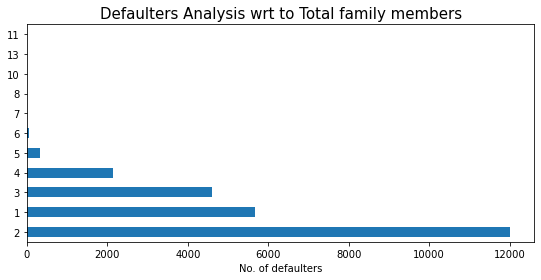

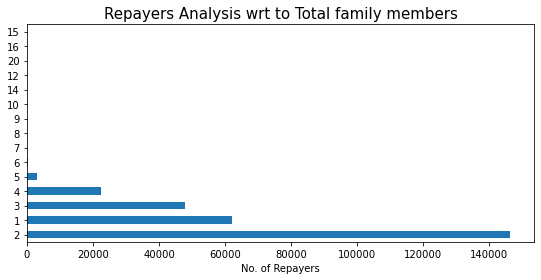

In [130]:
#calculate the percentage of each CNT_FAM_MEMBERS .
plt.figure(figsize=[20,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to Total family members', fontdict={'fontsize':15})
Defaulters['CNT_FAM_MEMBERS'].value_counts().plot.barh()
plt.xlabel('No. of defaulters')
plt.figure(figsize=[20,4])
plt.subplot(1,2,2)
plt.title('Repayers Analysis wrt to Total family members',fontdict={'fontsize':15})
Repayers['CNT_FAM_MEMBERS'].value_counts().plot.barh()
plt.xlabel('No. of Repayers')
plt.show()

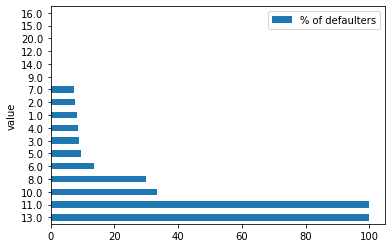

In [131]:
defaulters_per(app_data,'CNT_FAM_MEMBERS').plot.barh()
plt.show()

<div class="alert-info">


### Inputs from CNT_FAM_MEMBERS  
    
1) Most application are from applicans having 2 family members.

2) But as the family members increases the deafulters % increases.(MAX-13 members)
    
3) But also we need to see that applicants with more than 5 family members are very low.

### Numerical univariate analysis

In [132]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,AGE_GROUP,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,20-30,0-5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,40-50,0-5
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,4260,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,50 above,0-5
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,9833,2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,50 above,5-10
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,4311,3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,50 above,5-10


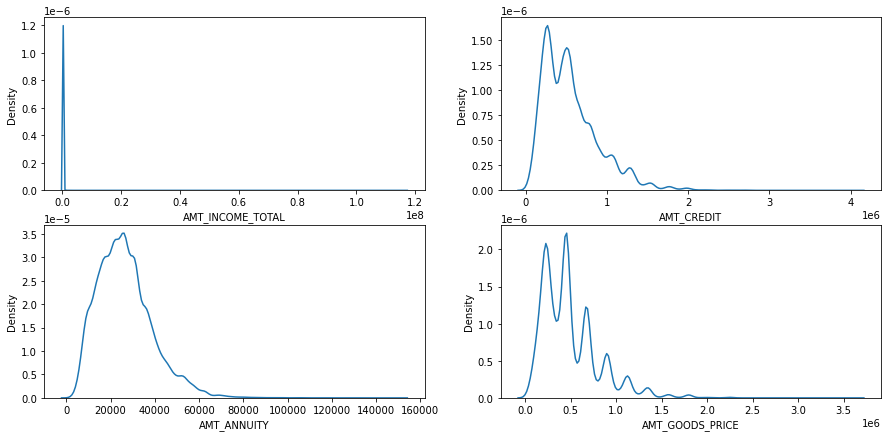

In [133]:
plt.figure(figsize=[15,7])
plt.subplot(2,2,1)
sns.distplot(Defaulters['AMT_INCOME_TOTAL'], hist = None)
plt.subplot(2,2,2)
sns.distplot(Defaulters['AMT_CREDIT'], hist = None)
plt.subplot(2,2,3)
sns.distplot(Defaulters['AMT_ANNUITY'], hist = None)
plt.subplot(2,2,4)
sns.distplot(Defaulters['AMT_GOODS_PRICE'], hist = None)
plt.show()

<div class="alert-info">


### Inputs from numeric analysis of amount .  
    
1) Income we have derived earlier that suggest lower the income greater the default rate .

2) Credit amount of loan is below 10 lakh.
    
3) Most people pay annuity below 40000 for the credit loan.

4) Most number of loans are given for goods price below 10 lakhs.

5) There are no much insights which are useful for analysis .

### Bivariate Analysis

Numeric- numeric analysis

In [134]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,AGE_GROUP,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,20-30,0-5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,40-50,0-5
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,4260,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,50 above,0-5
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,9833,2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,50 above,5-10
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,4311,3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,50 above,5-10


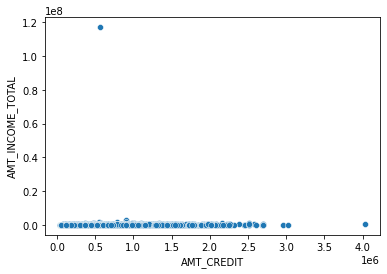

In [135]:
#plot the scatter plot of balance and salary variable in inp1

sns.scatterplot(Defaulters['AMT_CREDIT'], Defaulters['AMT_INCOME_TOTAL'])
plt.show()

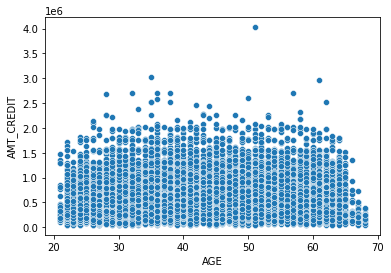

In [136]:
sns.scatterplot(Defaulters['AGE'],Defaulters['AMT_CREDIT'])
plt.show()

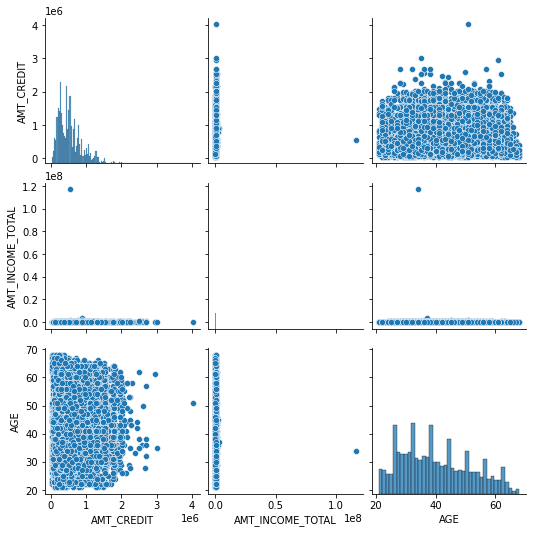

In [137]:
#plot the pair plot of salary, balance and age in defaulters.
sns.pairplot(data=Defaulters, vars= ('AMT_CREDIT','AMT_INCOME_TOTAL','AGE'))
plt.show()

In [138]:
# correlation heatmap
Defaulters[['AMT_CREDIT','AMT_INCOME_TOTAL','AGE']].corr()

,AMT_CREDIT,AMT_INCOME_TOTAL,AGE
AMT_CREDIT,1.000000,0.038131,0.135070
AMT_INCOME_TOTAL,0.038131,1.000000,-0.003154
AGE,0.135070,-0.003154,1.000000


<AxesSubplot:>

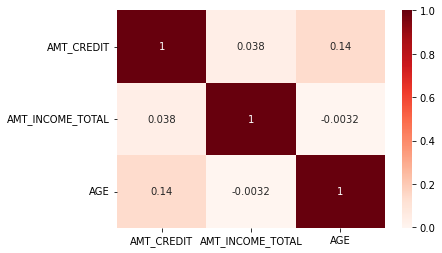

In [139]:
#plot the correlation matrix of AMT_CREDIT,AMT_INCOME_TOTAL,AGE in defaulters .
sns.heatmap(Defaulters[['AMT_CREDIT','AMT_INCOME_TOTAL','AGE']].corr(),annot=True,cmap='Reds')

<div class="alert-info">


### Inputs from Bivariant numeric-numeric analysis .  
    
1) There are no any significant patters observed even after applying correlation

### Bivariate Analysis
Categorical vs numerical

In [140]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,AGE_GROUP,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,20-30,0-5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,40-50,0-5
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,4260,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,50 above,0-5
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,9833,2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,50 above,5-10
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,4311,3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,50 above,5-10


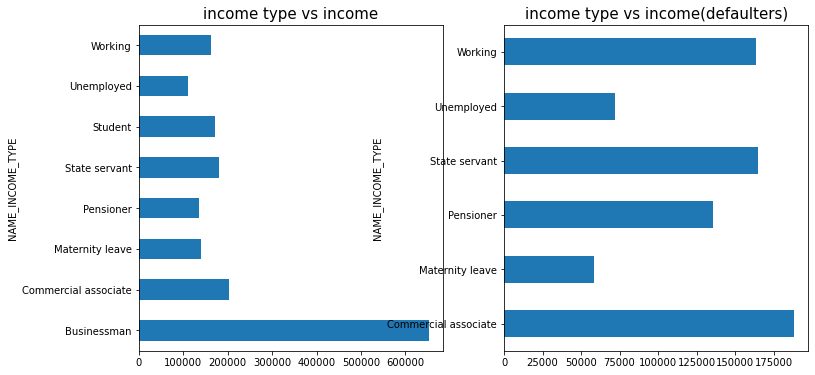

In [141]:
# barplot for income type vs income
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.title('income type vs income', fontdict={'fontsize':15})
app_data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].mean().plot.barh()
plt.subplot(1,2,2)
plt.title('income type vs income(defaulters)', fontdict={'fontsize':15})
Defaulters.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].mean().plot.barh()
plt.show()

<div class="alert-info">


### Inputs from income type vs income .  
    
1) Businessman have highest income in catgegory and also they are the once with no defaulters 

2) Commerical associates have high defaulters rate

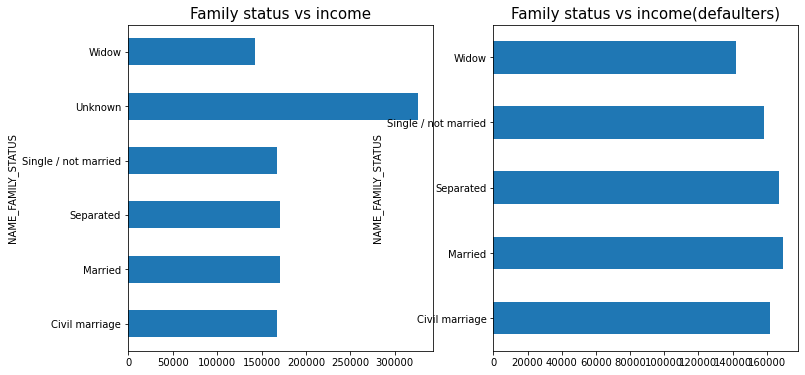

In [142]:
# Family status vs income
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.title('Family status vs income', fontdict={'fontsize':15})
app_data.groupby('NAME_FAMILY_STATUS')['AMT_INCOME_TOTAL'].mean().plot.barh()
plt.subplot(1,2,2)
plt.title('Family status vs income(defaulters)', fontdict={'fontsize':15})
Defaulters.groupby('NAME_FAMILY_STATUS')['AMT_INCOME_TOTAL'].mean().plot.barh()
plt.show()

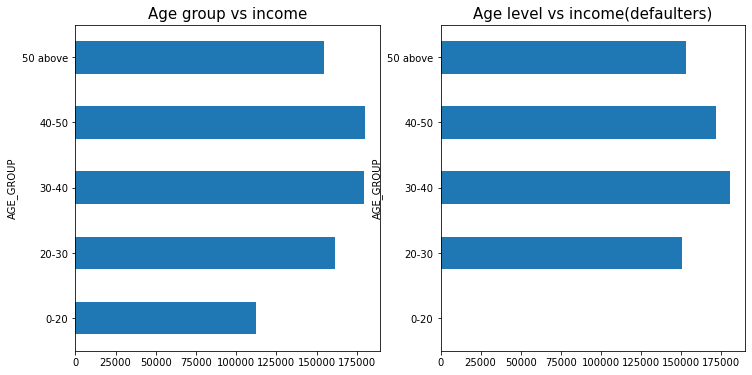

In [143]:
# Age group vs income
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.title('Age group vs income', fontdict={'fontsize':15})
app_data.groupby('AGE_GROUP')['AMT_INCOME_TOTAL'].mean().plot.barh()
plt.subplot(1,2,2)
plt.title('Age level vs income(defaulters)', fontdict={'fontsize':15})
Defaulters.groupby('AGE_GROUP')['AMT_INCOME_TOTAL'].mean().plot.barh()
plt.show()

<div class="alert-info">


### Inputs from Age group vs income .  
    
1) People with age group 40-50 have high income . 

2) But defaulters are more in 30-40 range with high income  

### Multivariate Analysis


In [144]:
corr1 = pd.pivot_table(data = app_data, index = 'NAME_EDUCATION_TYPE', columns = 'NAME_FAMILY_STATUS', values ='TARGET', aggfunc='mean')

In [145]:
corr1.drop('Unknown', axis = 1, inplace = True)

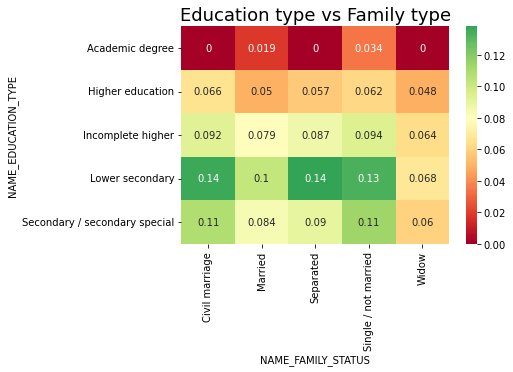

In [146]:
plt.title('Education type vs Family type', fontdict={'fontsize':18})
sns.heatmap(corr1, annot = True, cmap = 'RdYlGn', center = 0.08)
plt.show()

<div class="alert-info">


### Inputs from Education type vs Family type correlation.  
    
1) From heat map higher the correlation higher will be the defaulters rate. 

2) We can see that Lower secondary education with any family type except widow are more likely to be defaulters .

3) Even with secondary education of civil marriage abd single type have high default rate.
    
4) Academic degree people with any family type are very good repayers.

In [147]:
corr2 = pd.pivot_table(data = app_data, index = 'OCCUPATION_TYPE', columns = 'AGE_GROUP', values = 'TARGET', aggfunc='mean')

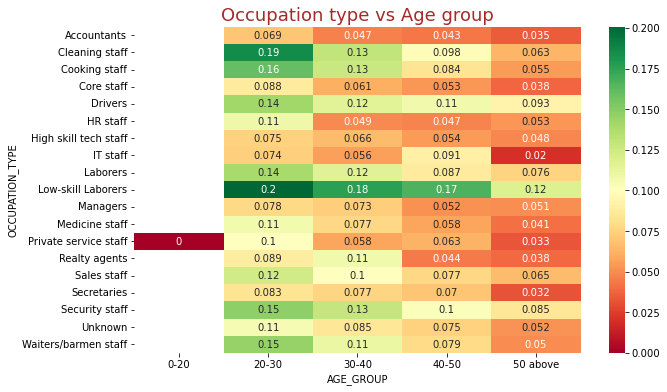

In [148]:
plt.figure(figsize = [10, 6])
plt.title('Occupation type vs Age group', fontdict={'fontsize':18, 'color':'Brown'})
sns.heatmap(corr2, cmap = 'RdYlGn', annot = True)
plt.show()

<div class="alert-info">


### Inputs from Occupation type vs Age group correlation.  
    
1) From heat map higher the correlation higher will be the defaulters rate. 

2) We can see that people of age group 20-30 are more likely to be defaulters except some job type .
    
3) But Realty agents,medicine staff,managers,IT staff,High skilled tech staff,core staff,accountants are repayers in all age group   

4) We can see that people of age group 50 and above are more likely to be repayers.
    

### TOP 10 CORRELATIONS OF DEFAULTERS AND REPAYERS

In [149]:
defaulter_corr = Defaulters.corr()
round(defaulter_corr, 2)

corr_list = defaulter_corr.unstack()

In [150]:
# Listing the correlations in pair sorted in descending order
corr_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                   SK_ID_CURR                     1.000000
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998269
AMT_CREDIT                   AMT_GOODS_PRICE                0.983103
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956637
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.868994
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.778540
AMT_ANNUITY                  AMT_GOODS_PRICE                0.752699
                             AMT_CREDIT                     0.752195
REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION     0.497937
dtype: float64

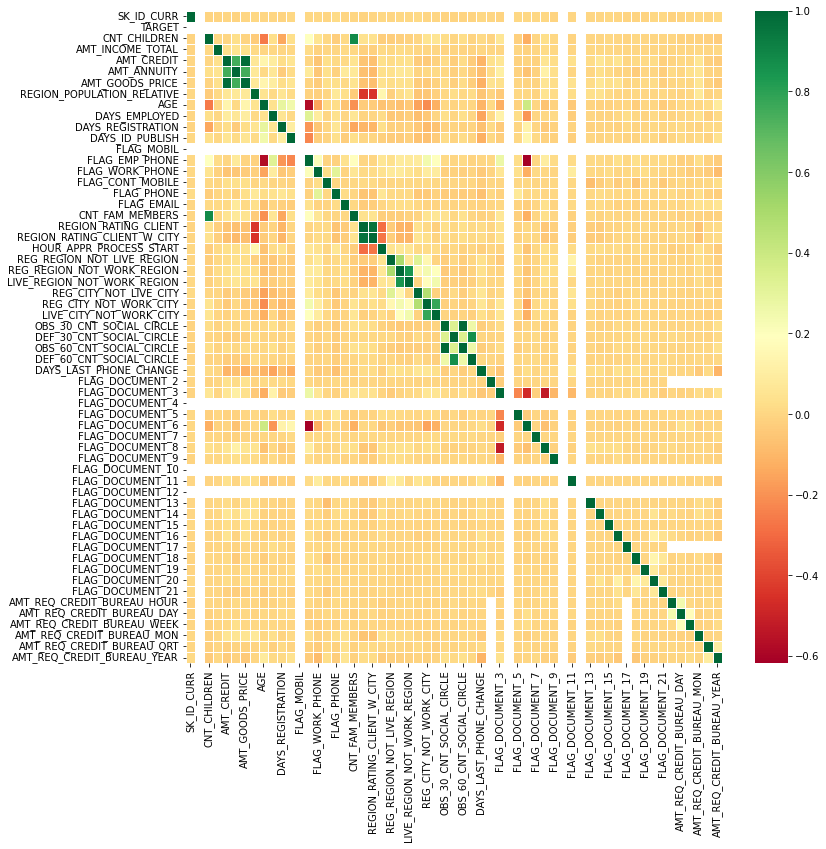

In [151]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Defaulters.corr(), cmap="RdYlGn",annot=False,linewidth =1)

<div class="alert-info">


### Inputs from defaulters correlation.  
    
1) Count of childrens is highly correlated with count of family members
    

In [152]:
Repayers_corr = Repayers.corr()
round(defaulter_corr, 2)

repy_list = Repayers_corr.unstack()

In [153]:
# Listing the correlations in pair sorted in descending order
repy_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                   SK_ID_CURR                     1.000000
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998508
AMT_CREDIT                   AMT_GOODS_PRICE                0.987251
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950146
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878574
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.861822
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.859331
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.830369
AMT_ANNUITY                  AMT_GOODS_PRICE                0.776686
AMT_CREDIT                   AMT_ANNUITY                    0.771309
REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_WORK_REGION     0.446093
dtype: float64

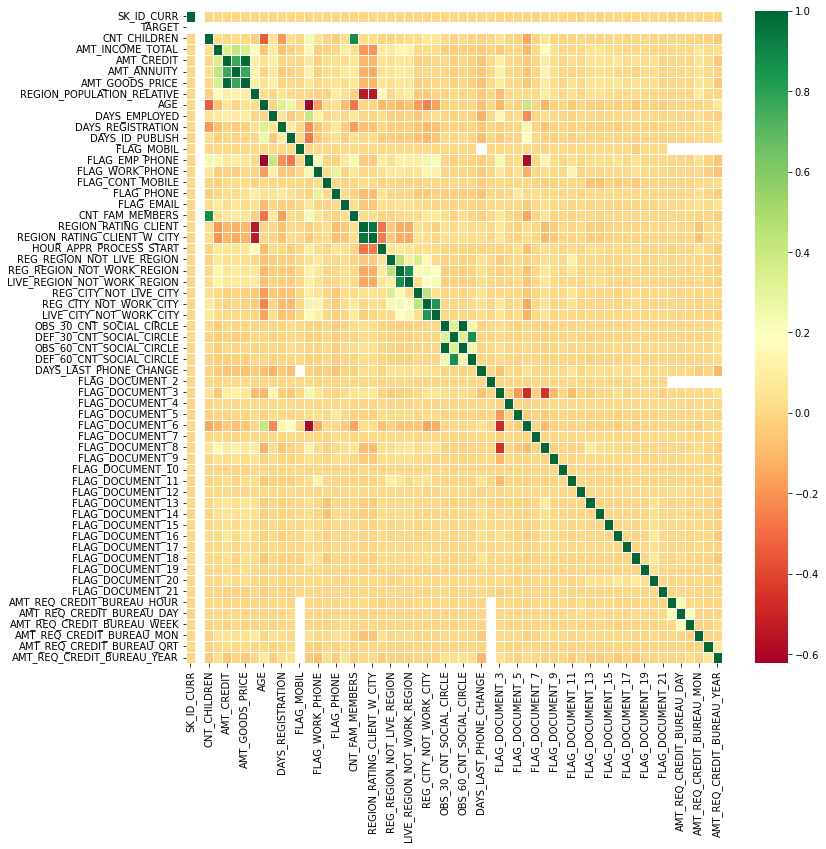

In [154]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Repayers.corr(), cmap="RdYlGn",annot=False,linewidth =1)

<div class="alert-info">


### Inputs from Reapyers correlation.  
    
1) Credit amount is highly correlated with amount of goods price , loan annuity, total income
    

### ANALYSIS ON PREVIOUS DATA

In [155]:
#Since data cleaning of previous data is completed we can analyse the prvious data
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [158]:
# we need target data for better analysis so the data has to be merged 
# check for the common columns in both data set for merging
for x in app_data.columns:
    if x in prev_data.columns:
        print(x)

SK_ID_CURR
NAME_CONTRACT_TYPE
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START


In [162]:
# merging prev data with app data by SK_ID_CURR column 
merge_data =  pd.merge(app_data, prev_data, how='inner', on='SK_ID_CURR')
merge_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,AGE_GROUP,YEARS_EMPLOYED,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,20-30,0-5,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,40-50,0-5,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,40-50,0-5,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,40-50,0-5,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,13500

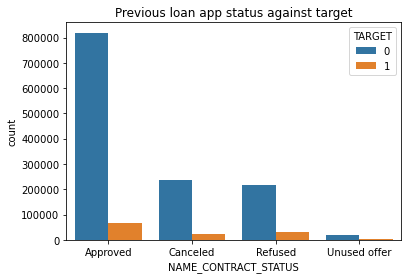

In [165]:
# check for previous loan application status against defaulters and repayers
plt.title("Previous loan app status against target")
sns.countplot(merge_data['NAME_CONTRACT_STATUS'], hue=merge_data['TARGET'])
plt.show()

<div class="alert-info">


### Inputs from Previous loan app status against target 
    
1) We can say that maximum rate of people whose loan was approved previously are likley to reapy the loan .

2) Even people whose prev application was canceled and refused previously have turned into potential repayers .
    

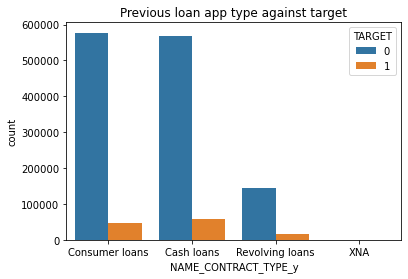

In [175]:
# check for previous loan application type against defaulters and repayers
plt.title("Previous loan app type against target")
sns.countplot(merge_data['NAME_CONTRACT_TYPE_y'], hue=merge_data['TARGET'])
plt.show()

<div class="alert-info">
    
### Inputs from previous loan application type against defaulters and repayers 
    
1) We can say that maximum loans are applied for consumer and cash type with less default

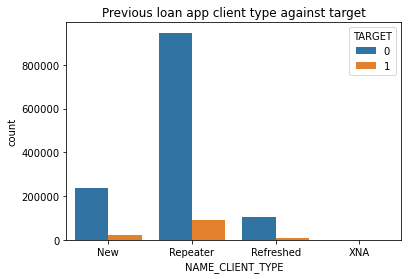

In [174]:
# check for previous loan application client type against defaulters and repayers
plt.title("Previous loan app client type against target")
sns.countplot(merge_data['NAME_CLIENT_TYPE'], hue=merge_data['TARGET'])
plt.show()

<div class="alert-info">
    
### Inputs from previous loan application client type against defaulters and repayers 
    
1) We can say that maximum client type are repeaters and this is good for business with less default

# OVERALL CONCULSION FROM DATASET

<div class="alert-success">


### CONCLUSION FACTORS FOR APPLICANTS WHO ARE REPAYERS 
    
1) CODE_GENDER : Female candidates are more likely to repay the loan .
    
2) NAME_CONTRACT_TYPE : Candidates who have taken Revolving loans are more likely repaying the loan.
    
3) NAME_INCOME_TYPE :Businessman and Student with least defaults rate.
    
4) NAME_EDUCATION_TYPE : Academic degree and higher education people are with least defaults rate.
    
5) REGION_RATING_CLIENT : Region 1 applicants are more likely repay.
    
6) AMT_INCOME_TOTAL: Applicant with Income more than 700,000 are less likely to default.
    
7) AGE_GROUP : Applicants who are above 50 are very good repayers.
    
8) CNT_CHILDREN: People with zero to two children are likely to repay the loans.
    
9) CNT_FAM_MEMBERS: Lower the family members applicant is more likely to repay the loan
    
10) YEARS_EMPLOYED: Applicants with 40+ year experience having less default rate
    
11)NAME_CONTRACT_STATUS: We can say that maximum rate of people whose loan was approved previously are likley to reapy the loan & Even people whose prev application was canceled and refused previously have turned into potential repayers .
    

<div class="alert-warning">


### CONCLUSION FACTORS FOR APPLICANTS WHO ARE DEFAULTERS
    
1) CODE_GENDER : Male candidates are having high default rate.
    
2) NAME_CONTRACT_TYPE : Candidates who have taken cash loans are more trouble repaying the loan.
    
3) NAME_INCOME_TYPE :But applicants with maternity leave type are more likely not to repay the loans then followed by unemployed category.
    
4) OCCUPATION_TYPE: Applicants of low-skill laborers occupation are more likely not to repay the loans
    
5) NAME_EDUCATION_TYPE : Applicants with lower secondary education are more likely not to repay the loans then followed by secondary education.
    
6) REGION_RATING_CLIENT : Applicants from region 3 are more likely not to repay the loans.
    
7) AMT_INCOME_TOTAL: ) Applicants whose income is in between 0 to 250000 are more likely to default.
    
8) AGE_GROUP : Applicants with age group 20-30 are more likely to default.
    
9) CNT_CHILDREN: The children’s increases more than 3 the default rate increases.
    
10) CNT_FAM_MEMBERS: The family members increases the defaulters % increases.(
    
11) YEARS_EMPLOYED: The % defaulters are high for applicants work experience 0-5 years
    
12) NAME_FAMILY_STATUS: Applicants with civil marriage and single are more likely not to repay the loans.

<div class="alert-warning">


### FACTORS FOR APPLICANTS WHO ARE DEFAULTERS BUT MAJOR CONTRIBUTERS 
    
1) INCOME_RANGE : Applicants whose income is in between 0 to 250000 are relatively more but aslo they are high defaulters so we can provide loan on high interest risk.
    
2) NAME_HOUSING_TYPE : People who stay in rented house and with parents are more likely to default but they are mojor applicants for loan so can be considered for high interest loan.
    
3)CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have more than 3 children has a very high default rate and hence higher interest can be imposed on their loans.